In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, Dropout
from keras.callbacks import Callback
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
class F1ScoreCallback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data
        self.f1_scores = []

    def on_epoch_end(self, epoch, logs=None):
        val_x, val_y_true = self.validation_data
        y_pred_probs = self.model.predict(val_x)
        y_pred = np.argmax(y_pred_probs, axis=1)
        y_true = np.argmax(val_y_true, axis=1)

        f1 = f1_score(y_true, y_pred, average='macro')
        self.f1_scores.append(f1)
        print(f'\nEpoch {epoch + 1} - Macro F1-score: {f1:.4f}')

    def on_train_end(self, logs=None):
        plt.plot(range(1, len(self.f1_scores) + 1), self.f1_scores, marker='o')
        plt.title('Macro F1-Score Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('F1 Score')
        plt.grid(True)
        plt.show()

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
f1_callback = F1ScoreCallback(validation_data=(x_test, y_test))

In [6]:
# Inspect data dimensions
print('X_train shape:', x_train.shape)
print('Training samples:', x_train.shape[0])
print('Test samples:', x_test.shape[0])

X_train shape: (50000, 32, 32, 3)
Training samples: 50000
Test samples: 10000


In [7]:
#Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

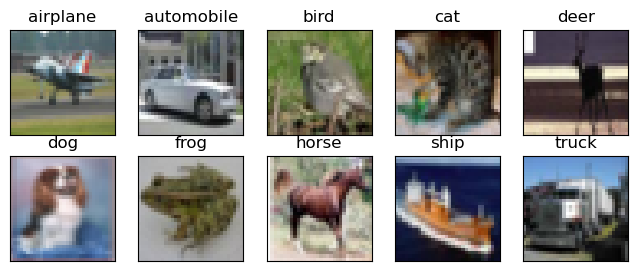

In [8]:
# Visualize one sample per class
def show_sample_images(X, y, class_names):
    fig = plt.figure(figsize=(8, 3))
    for i in range(10):
        ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
        idx = np.where(y.flatten() == i)[0]
        img = X[np.random.choice(idx)]
        ax.set_title(class_names[i])
        plt.imshow(img)
    plt.show()

show_sample_images(x_train, y_train, class_names)

In [9]:
# 2. Normalize pixel values to [0,1] and one-hot encode labels
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)

In [10]:
# 3. Define a simple Sequential CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

C:\Users\Akhila\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# 4. Compile the model
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/45
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step

Epoch 1 - Macro F1-score: 0.0249
782/782 - 37s - 48ms/step - accuracy: 0.3562 - loss: 1.7473 - val_accuracy: 0.5050 - val_loss: 1.3498
Epoch 2/45
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step

Epoch 2 - Macro F1-score: 0.0336
782/782 - 34s - 43ms/step - accuracy: 0.4798 - loss: 1.4423 - val_accuracy: 0.5797 - val_loss: 1.2091
Epoch 3/45
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step

Epoch 3 - Macro F1-score: 0.0379
782/782 - 33s - 42ms/step - accuracy: 0.5280 - loss: 1.3107 - val_accuracy: 0.6175 - val_loss: 1.1075
Epoch 4/45
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step

Epoch 4 - Macro F1-score: 0.0373
782/782 - 41s - 53ms/step - accuracy: 0.5592 - loss: 1.2277 - val_accuracy: 0.6305 - val_loss: 1.0392
Epoch 5/45
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step

Epoch 5 - Macro F1-score: 0.0290
782/782 - 33s - 42ms/step - accuracy: 0.5846 - loss: 1.1638 - val_accuracy: 0.6421 - val_loss: 1.0320
Epoch 6/45
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step

E

Epoch 38/45
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step

Epoch 38 - Macro F1-score: 0.0253
782/782 - 45s - 57ms/step - accuracy: 0.8112 - loss: 0.5038 - val_accuracy: 0.7169 - val_loss: 1.0363
Epoch 39/45
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step

Epoch 39 - Macro F1-score: 0.0256
782/782 - 46s - 58ms/step - accuracy: 0.8146 - loss: 0.4918 - val_accuracy: 0.7171 - val_loss: 1.0017
Epoch 40/45
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step

Epoch 40 - Macro F1-score: 0.0272
782/782 - 45s - 57ms/step - accuracy: 0.8165 - loss: 0.4887 - val_accuracy: 0.7175 - val_loss: 1.0148
Epoch 41/45
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step

Epoch 41 - Macro F1-score: 0.0353
782/782 - 46s - 59ms/step - accuracy: 0.8190 - loss: 0.4775 - val_accuracy: 0.7195 - val_loss: 1.0502
Epoch 42/45
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step

Epoch 42 - Macro F1-score: 0.0335
782/782 - 47s - 60ms/step - accuracy: 0.8210 - loss: 0.4686 - val_accuracy: 0.7201 - val_loss: 1.0592
Epoch 43/45
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 1

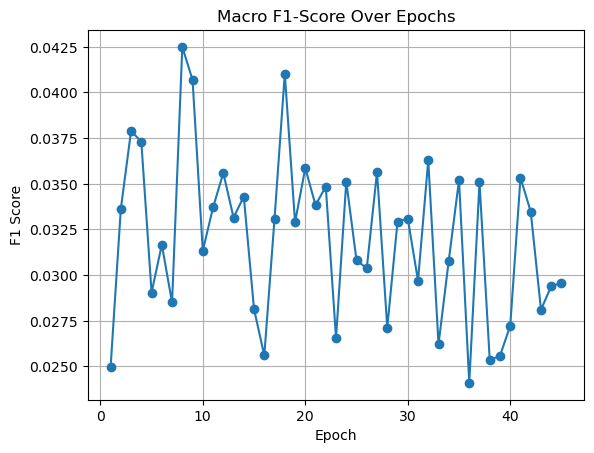

In [13]:
# 5. Train on numpy arrays 
history = model.fit(
    x_train, y_train,
    epochs=45,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[f1_callback],
    verbose=2
)

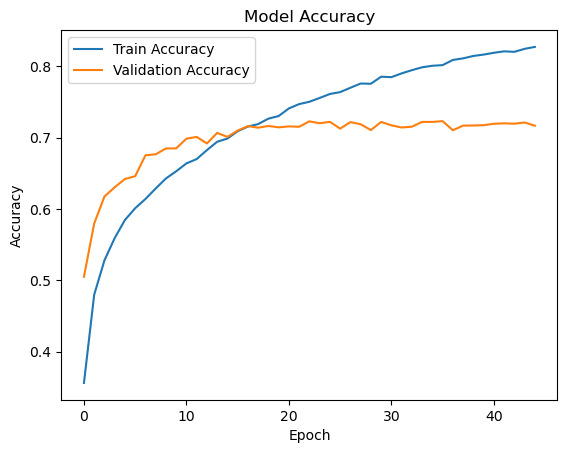

In [14]:
# 6. Plot training & validation accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


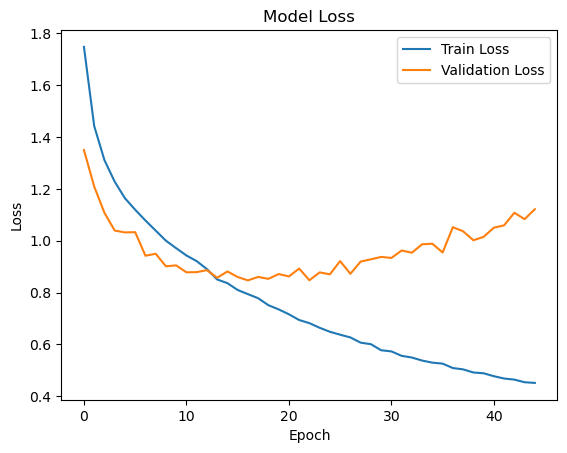

In [15]:
# 7. Plot training & validation loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
# 8. Evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

Test accuracy: 0.7168
Test loss: 1.1215


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


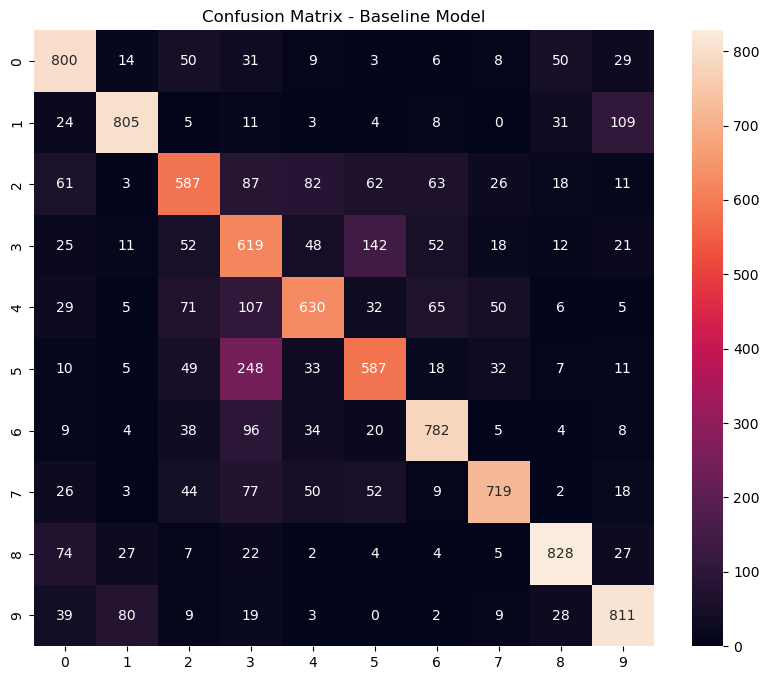

              precision    recall  f1-score   support

           0       0.73      0.80      0.76      1000
           1       0.84      0.81      0.82      1000
           2       0.64      0.59      0.61      1000
           3       0.47      0.62      0.53      1000
           4       0.70      0.63      0.67      1000
           5       0.65      0.59      0.62      1000
           6       0.78      0.78      0.78      1000
           7       0.82      0.72      0.77      1000
           8       0.84      0.83      0.83      1000
           9       0.77      0.81      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [17]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix - Baseline Model")
plt.show()

print(classification_report(y_true, y_pred))


In [19]:
import pandas as pd

df = pd.DataFrame(history.history)
df.to_csv('Baseline_training_log.csv', index=False)
